In [3]:
%matplotlib inline
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import datetime
from tqdm import tqdm

## Stock analyzer

### Goals:

1. Read historic stock price data
2. Visualize stock charts
3. Write functions to obtain empirical stock indicators (e.g. Uwe Lang)
4. Run accurate test using above empirical stock indicators using historic data

## 1. Read stock data (pandas_datareader)

In [30]:
# Dictionary of stocks to read (Name: Ticker symbol))
stocks = {"Apple": "AAPL", "Google":"GOOG", "Coca Cola":"KO"}

# A good list of ticker symbols for indexes:
# http://eoddata.com/stocklist/INDEX/A.htm

In [32]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2019, 10, 29)

stock_data_dataframe = pd.DataFrame()

for name, ticker_symbol in tqdm(stocks.items()):
    # Query stock data from yahoo
    # TODO: error handling if symbol is not found
    current_stock_data = web.DataReader(ticker_symbol, 'yahoo', start, end)        
    
    # Add info about stock in new columns
    current_stock_data["Ticker symbol"] = ticker_symbol
    current_stock_data["Name"] = name
    
    # Add date as column and not just index
    current_stock_data["Date"] = current_stock_data.index
    
    # Append to big dataframe
    stock_data_dataframe = stock_data_dataframe.append(current_stock_data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.75s/it]


## 2. Plot stock data

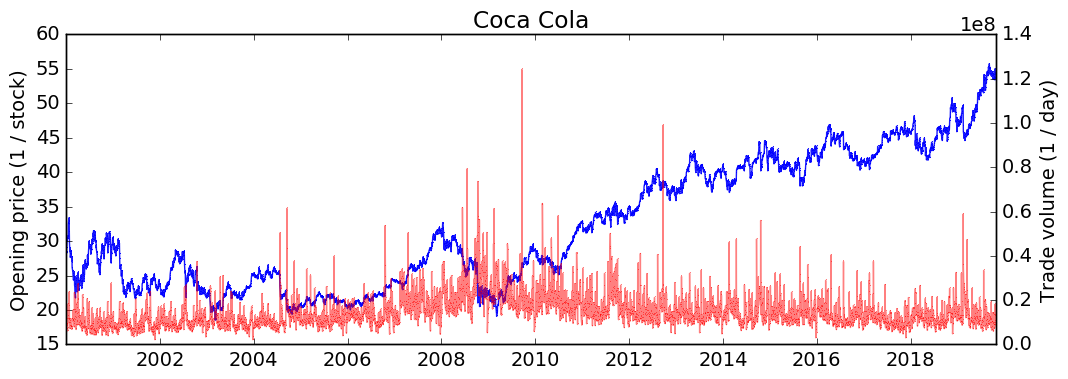

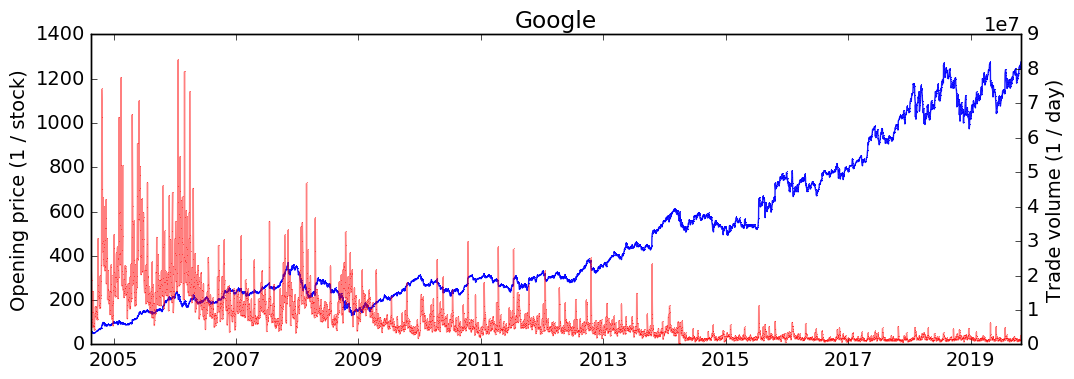

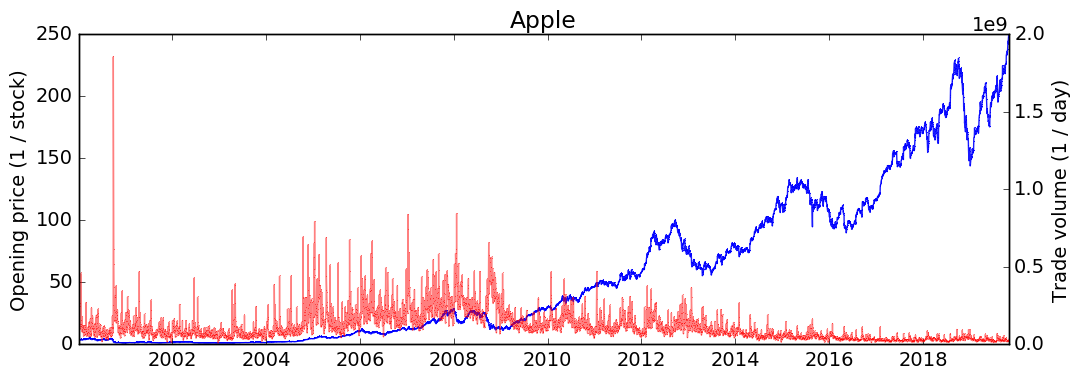

In [33]:
# Plot stocks
plt.rcParams.update({'font.size': 14})

for stock_str in stock_data_dataframe["Name"].unique():
    stock_data_dataframe_subset = stock_data_dataframe[stock_data_dataframe["Name"] == stock_str]
    
    fig, ax1 = plt.subplots(figsize=(12,4))
    
    x = stock_data_dataframe_subset["Date"]
    y1 = stock_data_dataframe_subset["Open"]
    y2 = stock_data_dataframe_subset["Volume"]
    
    plt.title(stock_str)
    
    plt.ylabel("Opening price (1 / stock)")
    ax2 = ax1.twinx()
    ax1.plot(x, y1, ',-', alpha = 0.9)
    
    ax2.plot(x, y2, ',-', color = (1,0,0), alpha = 0.5)
    plt.ylabel("Trade volume (1 / day)")